Доржиев А.С. АБД19-1М

Доделать: в задании 4 увеличить обьем текста - СДЕЛАНО

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers 
from keras import metrics
import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import mnist, cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD 
from keras.utils import np_utils
from keras.layers import SimpleRNN

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Воспроизведите код из лекционного примера для "временного ряда"

In [ ]:
# Моделируем периодические данные
N=1000
Tp = 800
t=np.arange(0,N)
x=np.sin(0.02*t)+2*np.random.rand(N)
df = pd.DataFrame(x)
values=df.values
train,test = values[0:Tp,:], values[Tp:N,:]

In [ ]:
df.head()

,0
0,1.427325
1,0.162352
2,1.774995
3,0.101901
4,0.453445


In [ ]:
step=4 
test=np.append(test,np.repeat(test[-1,],step)) 
train = np.append(train,np.repeat(train[-1,],step))

def convertToMatrix(data,step):
   X,Y=[],[]
   for i in range(len(data)-step):
     d=i+step 
     X.append(data[i:d,]) 
     Y.append(data[d,])
   return np.array(X), np.array(Y)

trainX,trainY =convertToMatrix(train,step) 
testX,testY=convertToMatrix(test,step)

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX.shape

(800, 1, 4)

In [ ]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1,step), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 32)                1184      
_________________________________________________________________
dense (Dense)                (None, 8)                 264       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 1,457
Trainable params: 1,457
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(trainX,trainY, epochs=100, batch_size=16, verbose=2)
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)

trainScore = model.evaluate(trainX, trainY, verbose=0)
print(trainScore)


Epoch 1/100
50/50 - 0s - loss: 0.3684
Epoch 2/100
50/50 - 0s - loss: 0.3684
Epoch 3/100
50/50 - 0s - loss: 0.3654
Epoch 4/100
50/50 - 0s - loss: 0.3681
Epoch 5/100
50/50 - 0s - loss: 0.3660
Epoch 6/100
50/50 - 0s - loss: 0.3642
Epoch 7/100
50/50 - 0s - loss: 0.3657
Epoch 8/100
50/50 - 0s - loss: 0.3647
Epoch 9/100
50/50 - 0s - loss: 0.3671
Epoch 10/100
50/50 - 0s - loss: 0.3655
Epoch 11/100
50/50 - 0s - loss: 0.3653
Epoch 12/100
50/50 - 0s - loss: 0.3639
Epoch 13/100
50/50 - 0s - loss: 0.3639
Epoch 14/100
50/50 - 0s - loss: 0.3631
Epoch 15/100
50/50 - 0s - loss: 0.3622
Epoch 16/100
50/50 - 0s - loss: 0.3624
Epoch 17/100
50/50 - 0s - loss: 0.3615
Epoch 18/100
50/50 - 0s - loss: 0.3607
Epoch 19/100
50/50 - 0s - loss: 0.3623
Epoch 20/100
50/50 - 0s - loss: 0.3615
Epoch 21/100
50/50 - 0s - loss: 0.3620
Epoch 22/100
50/50 - 0s - loss: 0.3621
Epoch 23/100
50/50 - 0s - loss: 0.3605
Epoch 24/100
50/50 - 0s - loss: 0.3576
Epoch 25/100
50/50 - 0s - loss: 0.3603
Epoch 26/100
50/50 - 0s - loss: 0.

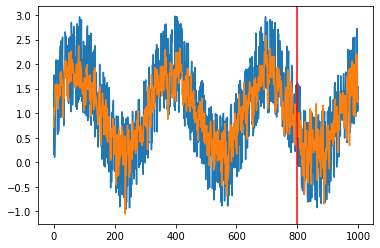

In [ ]:
index = df.index.values
plt.plot(index,df)
plt.plot(index,predicted)
plt.axvline(df.index[Tp], c="r")
plt.show() 

# 2. Возьмите наблюдения за курсом каких-либо акций и предскажите стоимость акции на день вперед с помощью простой RNN

https://github.com/ranaroussi/yfinance

https://medium.com/@jouneidraza522/yahoo-finance-api-to-get-stocks-tickers-data-in-python-c49820249a18

In [ ]:
 pip install yahoo-finance

     |████████████████████████████████| 133kB 4.3MB/s 
  Created wheel for yahoo-finance: filename=yahoo_finance-1.4.0-cp36-none-any.whl size=7234 sha256=67507a3de2b12e827a6b57ae0ea5c93aec7196124ff1d7409b57208cc9d98739
  Stored in directory: /root/.cache/pip/wheels/58/77/5b/66026e0fa7af2ee5926a516a70d3df95e17f952c570bc5aee6
Successfully built yahoo-finance


In [ ]:
pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=29e013728a197a5d89f252039f22799f40d42e87517f278cb41542b5b3242bc2
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [ ]:
from pandas_datareader import data as pdr

In [ ]:
# Данные для обучения
train = pdr.get_data_yahoo('AAPL', start="2020-08-01", end="2020-09-01")
train = train[['Open']].values

# Для преобразования данных
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
train = mms.fit_transform(train)

# Выделяем фичи и таргет
X_train = train[0:-1]
y_train = train[1:]

# Reshaping
X_train = np.reshape(X_train, (len(X_train), 1, 1))

[*********************100%***********************]  1 of 1 completed


In [ ]:
X_train.shape

(20, 1, 1)

In [ ]:
# Построение Сети 
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(None, 1), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 32)                1088      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 1,361
Trainable params: 1,361
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X_train, y_train, batch_size=10, epochs=200)

Epoch 1/200
2/2 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2/200
2/2 [==============================] - 0s 3ms/step - loss: 0.0252
Epoch 3/200
2/2 [==============================] - 0s 2ms/step - loss: 0.0251
Epoch 4/200
2/2 [==============================] - 0s 2ms/step - loss: 0.0249
Epoch 5/200
2/2 [==============================] - 0s 2ms/step - loss: 0.0247
Epoch 6/200
2/2 [==============================] - 0s 2ms/step - loss: 0.0246
Epoch 7/200
2/2 [==============================] - 0s 2ms/step - loss: 0.0244
Epoch 8/200
2/2 [==============================] - 0s 4ms/step - loss: 0.0242
Epoch 9/200
2/2 [==============================] - 0s 2ms/step - loss: 0.0241
Epoch 10/200
2/2 [==============================] - 0s 3ms/step - loss: 0.0239
Epoch 11/200
2/2 [==============================] - 0s 2ms/step - loss: 0.0238
Epoch 12/200
2/2 [==============================] - 0s 2ms/step - loss: 0.0236
Epoch 13/200
2/2 [==============================] - 0s 2ms/st

In [ ]:
# Тестовые данные
test = pdr.get_data_yahoo('AAPL', start="2020-08-01", end="2020-09-02")
real_price = test[['Open']].values

inputs = real_price
inputs = mms.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_price = model.predict(inputs)
predicted_price = mms.inverse_transform(predicted_price)

[*********************100%***********************]  1 of 1 completed


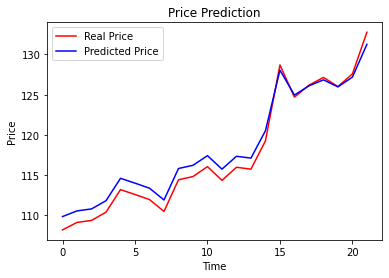

In [ ]:
# Визуализируем
plt.plot(real_price, color='red', label='Real Price')
plt.plot(predicted_price, color='blue', label='Predicted Price')
plt.title('Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# 3. Воспроизведите RNN для анализа бинарной тональности коротких выражений на русском языке. Для базы данных каждый предлагает по 10 экземпляров для обучающего и тестового словарей, обмен данными через облако.

Найти датасэт с размеченными словами 

In [ ]:
train_data = {''}


In [ ]:
test_data = {''}

# 4. Воспроизведите простую RNN для генерации текста

 Посмотреть на большом тексте, LSTM + плотнее сетку

стр 313 Шолле - про LSTM для генерации текста

In [ ]:
text = '''
Впервые о Манджукиче заговорили в 2007 году, когда 21-летний форвард помог загребскому «Динамо» пройти «Аякс» в Кубке УЕФА. Марио забил два мяча в ответной встрече, а также заработал пенальти, который реализовал Лука Модрич. Интерес к Манджукичу проявляли «Шахтёр» и «Манчестер Сити», но игрок решил остаться в «Динамо». 
Тогда же Марио получил вызов в сборную Хорватии, однако закрепиться с ходу в основе ему не удалось. Манджукич проигрывал конкуренцию Оличу и Эдуардо да Силве, а в ближайшем резерве сидели Петрич и Класнич. Лишь в 2010 году Марио стал игроком стартового состава «клетчатых». Летом того же года Манджукич перешёл в «Вольфсбург» (сумма трансфера составила 7 млн евро). 
В Германии 190-сантиметровый форвард поначалу играл на фланге, хотя куда полезнее был в центре атаки. Позже этот навык пригодится Марио. В первом сезоне за «Вольфсбург» Манджукич провёл 28 матчей, записав на свой счёт 10 голов и 3 результативных передачи. Через год – уже 33 матча, 12 забитых мячей и 10 голевых. В известной степени прогрессу Марио способствовал уход Эдина Джеко. Во многом из-за боснийца Манджукич и выходил на фланге либо вообще оставался на скамейке запасных. В январе 2011 года Джеко отправился в «Манчестер Сити», и Марио обосновался в центре нападения. 
Впрочем, надолго в «Вольфсбурге» Манджукич не задержался – летом 2012 года пополнил состав «Баварии». Хорвата брали в качестве потенциальной замены Марио Гомесу, который позже получил травму лодыжки и начал «сдуваться». В сезоне-2011/2012, ещё до прихода Манджукича, Гомес забил 41 гол в 52 матчах за «Баварию». «Травма Гомеса меня не радует, – признался Манджукич. – Не хотелось бы получать игровое время из-за таких обстоятельств. Марио – хороший человек, мы общаемся с ним, он поздравляет меня с голами. Я готов к тому, что придётся бороться за место в основе, когда Гомес вернётся в строй».
Пик карьеры и первые проблемы. В сезоне-2012/2013 Манджукич и Гомес играли по очереди. Чуть лучше действовал хорват – 22 гола против 19 у немца. Через год Гомес перейдёт в «Фиорентину» и больше не вернётся на прежний уровень. Манджукич же утвердился в статусе топ-форварда: регулярно забивал за «Баварию» и блеснул на Евро-2012 в составе сборной. 
Когда появилась информация о переходе в «Баварию» Роберта Левандовского, стало понятно, что Манджукича продадут. «Марио очень хорош, но приход Левандовского усилит атаку «Баварии». Он лучше двигается и обращается с мячом», – объяснил почётный президент мюнхенцев Франц Беккенбауэр. Польский форвард больше подходил под требования Хосепа Гвардиолы, возглавлявшего тогда «Баварию», нежели Манджукич. Марио, по слухам, был готов к конкуренции с Левандовским, но испанский специалист решил иначе. 
Летом 2014 года хорвата продали в «Атлетико». Там Марио сменил Диего Косту, перешедшего в «Челси». Манджукич быстро вписался в игру «Атлетико», но покинул клуб уже через год. Причиной якобы стал конфликт игрока с Диего Симеоне: по информации испанской прессы, Манджукич был недоволен решением главного тренера, который оставил его на скамейке запасных в одном из важных матчей.
Новым клубом Марио стал «Ювентус», а наиболее успешным периодом в Турине – первые два года. В сезоне-2015/2016 хорват забил 13 голов в 36 матчах за «Юве», после чего Массимилиано Аллегри перевёл Марио на левый фланг. Там Манджукич действовал крайне полезно: отрабатывал в обороне, помогал впереди Гонсало Игуаину, смещаясь в центр при навесах, а также неплохо ассистировал партнёрам. 
Начиная с сезона-2017/2018 Марио мучился от травм. За два года он пропустил 26 матчей из-за различных повреждений и болезней. Несмотря на это, в «Юве» продлили контракт с форвардом, и даже подняли ему зарплату (с 3 до 6 млн евро в год). В 2019 году, с приходом в клуб Маурицио Сарри, Манджукич пропал. Он просто оказался не нужен новому главному тренеру. Марио не включили в заявку на Лигу чемпионов, не играл хорват и в чемпионате Италии. 
Нужно отдать должное Манджукичу – он не лил грязь на «Ювентус» в прессе. Марио терпеливо ждал, когда руководство даст чёткий ответ по его будущему в клубе. К хорвату проявлял интерес «Манчестер Юнайтед», но трансфер так и не состоялся. Манджукич до последнего пытался остаться в Европе, отметая все предложения из Китая и Катара. Так, например, Марио сорвал собственный переход в «Аль-Райян». В январе 2020 года Манджукич всё-таки перебрался в Катар, но уже в другой клуб – «Аль-Духаиль».
«Локомотив» рискует, подписывая Манджукича. В Катаре звезде создали отличные условия. По слухам, за полтора в года «Аль-Духаиле» он заработал бы 12 млн евро. Казалось, что Манджукич «забил» на футбол, как многие игроки, оказавшиеся в Китае или странах Ближнего Востока. Однако спустя всего полгода Марио покинул «Аль-Духаиль» свободным агентом. Хорват успел принять участие лишь в семи встречах за катарский клуб. 
Манджукич мог оказаться в «Фиорентине», куда его звал Франк Рибери. Интерес к Марио проявляли также «Рома» и «Фенербахче». Первым в гонке за хорвата, похоже, пришёл «Локомотив». По нашей информации, «железнодорожники» согласовали с Манджукичем условия личного контракта. Зарплата Марио в «Локомотиве» составит около 2,7 млн евро, срок соглашения – два года. Главный «железнодорожник» Марко Николич накануне уклончиво ответил на вопрос о готовящемся трансфере: «Если можно усилить команду – это хорошо. Я думаю, что у нас будут 2-3 игрока, которые усилят команду». Как говорят в таких случаях, не подтвердил, но и не опроверг информацию. 
Очевидно, что при всех умениях, опыте и регалиях нападающего «Локомотив» сильно рискует с Манджукичем. Он, безусловно, форвард высокого уровня, но 34 года – уже «предпенсионный» для полевого игрока возраст. При этом хорват толком не играл последние полтора сезона, и ожидать от него сходу результативных действий, наверное, наивно. А с другой стороны, у Марио появился шанс завершить карьеру красиво. У «Локомотива» всё для этого есть – деньги, болельщики, Лига чемпионов.
'''

In [ ]:
len(text)

5923

In [ ]:
chars = set([c for c in text])
nbch = len(chars)
ch2ind = dict((c,i) for i,c in enumerate(chars))
ind2ch = dict((i,c) for i,c in enumerate(chars))

In [ ]:
slen = 10
step = 1
inch = [] 
labch = []
for i in range(0, len(text)-slen, step):
  inch.append(text[i:i+slen])
  labch.append(text[i+slen])

In [ ]:
x = np.zeros((len(inch), slen, nbch), dtype = np.bool)
y = np.zeros((len(inch), nbch), dtype = np.bool)

In [ ]:
for i,j in enumerate(inch): 
  for j1, ch in enumerate(j): 
    x[i, j1, ch2ind[ch]] = 1 
  y[i, ch2ind[labch[i]]] = 1

In [ ]:
model = Sequential()
model.add(SimpleRNN(128, return_sequences=False, input_shape=(slen, nbch), unroll=True))
model.add(Dense(nbch))
model.add(Activation('softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 128)               26752     
_________________________________________________________________
dense_1 (Dense)              (None, 80)                10320     
_________________________________________________________________
activation_1 (Activation)    (None, 80)                0         
Total params: 37,072
Trainable params: 37,072
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
for iter2 in range(25): 
  print("="*40)
  print("Iteration #: %d" % (iter2))
  model.fit(x, y, batch_size=128, epochs=1)
  testid = np.random.randint(len(inch))
  testch = inch[testid]
  print(testch, end=" ")
  for i in range(50): 
    xtest = np.zeros((1,slen, nbch))
    for i, ch in enumerate(testch):
      xtest[0,i,ch2ind[ch]]=1
    pred = model.predict(xtest, verbose=0)[0]
    ypred = ind2ch[np.argmax(pred)]
    print(ypred,end="")
    testch = testch[1:]+ypred
  print() 

Iteration #: 0
47/47 [==============================] - 0s 3ms/step - loss: 3.6513
арию» Робе                                                   
Iteration #: 1
47/47 [==============================] - 0s 3ms/step - loss: 3.3215
не лил гря     а аа     а а     а а     а а     а а     а а  
Iteration #: 2
47/47 [==============================] - 0s 3ms/step - loss: 3.2195
имилиано А  аоааа а аоана  оана   аоааа  о оаа а  аааа   аааа
Iteration #: 3
47/47 [==============================] - 0s 3ms/step - loss: 3.0791
арко Никол   ааааа   а аа е та а  о аа а а аа ва и  о аааа   
Iteration #: 4
47/47 [==============================] - 0s 3ms/step - loss: 2.9531
клетчатых»   арео  о ооре  о аари  о ооре  о аари  о ооре  о 
Iteration #: 5
47/47 [==============================] - 0s 3ms/step - loss: 2.8243
мотив» рис  о со варив с ив о соро варио  вала со вали со оа 
Iteration #: 6
47/47 [==============================] - 0s 3ms/step - loss: 2.7172
иве» соста т вара воро о вара то варив о ааре т